In [ ]:
#Get username and number of times user has logged out of facebook

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [20]:
path = '/home/sejal/Documents/datascience/dataset/data/facebook_logs/facebook_login_logout_logs'

df = pd.read_csv(path, names=['name','date','hm','action'])
pdf = df[['name','action']]

print pdf

                       name action
0   mehul.chopra@neebal.com     in
1   narendra.modi@yahoo.com    out
2    katrina.kaif@gmail.com    out
3   mehul.chopra@neebal.com    out
4   narendra.modi@yahoo.com    out
5   mehul.chopra@neebal.com    out
6   mehul.chopra@neebal.com    out
7   mehul.chopra@neebal.com     in
8   mehul.chopra@neebal.com    out
9    katrina.kaif@gmail.com    out
10  narendra.modi@yahoo.com    out
11  narendra.modi@yahoo.com    out
12   katrina.kaif@gmail.com     in
13  narendra.modi@yahoo.com    out
14  mehul.chopra@neebal.com     in
15  narendra.modi@yahoo.com    out
16   katrina.kaif@gmail.com    out
17  mehul.chopra@neebal.com     in


In [23]:
#filter only out's
onlyouts = pdf[pdf['action'] == 'out']
print onlyouts

                       name action
1   narendra.modi@yahoo.com    out
2    katrina.kaif@gmail.com    out
3   mehul.chopra@neebal.com    out
4   narendra.modi@yahoo.com    out
5   mehul.chopra@neebal.com    out
6   mehul.chopra@neebal.com    out
8   mehul.chopra@neebal.com    out
9    katrina.kaif@gmail.com    out
10  narendra.modi@yahoo.com    out
11  narendra.modi@yahoo.com    out
13  narendra.modi@yahoo.com    out
15  narendra.modi@yahoo.com    out
16   katrina.kaif@gmail.com    out


In [25]:
pivot = onlyouts.pivot_table('action',aggfunc=np.count_nonzero, index='name')
pivot

,action
name,
katrina.kaif@gmail.com,3
mehul.chopra@neebal.com,4
narendra.modi@yahoo.com,6


In [30]:
#Same thing mehul did this way

p_onlyout = onlyouts['name']
number_of_outs = p_onlyout.value_counts()

print number_of_outs

narendra.modi@yahoo.com    6
mehul.chopra@neebal.com    4
katrina.kaif@gmail.com     3
Name: name, dtype: int64


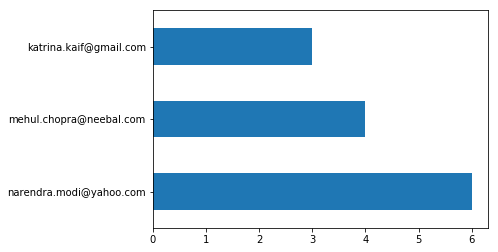

In [33]:
number_of_outs.plot(kind='barh')
plt.show()

In [58]:
#get username, numer of logins, number of logout

pdf['count'] = 1

pivot_table = pdf.pivot_table('count',aggfunc=np.sum,index='name', columns='action').fillna(0)
pivot_table

/home/sejal/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


action,in,out
name,,
katrina.kaif@gmail.com,1.0,3.0
mehul.chopra@neebal.com,4.0,4.0
narendra.modi@yahoo.com,0.0,6.0


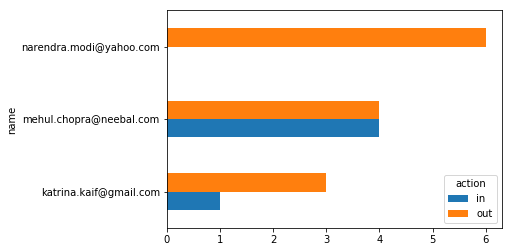

In [62]:
pivot_table.plot(kind='barh')
plt.show()

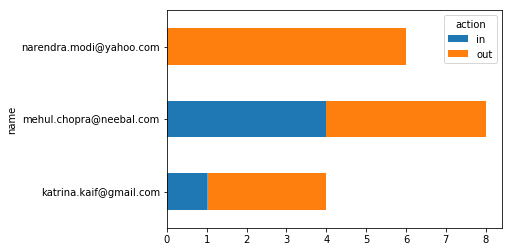

In [63]:
pivot_table.plot(kind='barh',stacked=True)
plt.show()